In [2]:
!pip install imbalanced-learn

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,KFold,cross_val_score,learning_curve,GridSearchCV
from sklearn.ensemble import RandomForestClassifier,IsolationForest,RandomForestRegressor,AdaBoostClassifier,VotingClassifier
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.neighbors import LocalOutlierFactor,KNeighborsClassifier
from sklearn.decomposition import PCA  
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE,RandomOverSampler,ADASYN
import seaborn as sns

import warnings
warnings.filterwarnings("ignore", message="KMeans is known to have a memory leak on Windows with MKL")

In [4]:
ml_data = pd.read_csv('hcvdat0.csv')
ml_data.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [5]:
# Removing Unnamed:0 , as it an unnecssary index column from the csvfile
ml_data.drop(['Unnamed: 0'], axis=1 ,inplace=True)

In [6]:
# Checking datatype of attributes
ml_data.dtypes

Category     object
Age           int64
Sex          object
ALB         float64
ALP         float64
ALT         float64
AST         float64
BIL         float64
CHE         float64
CHOL        float64
CREA        float64
GGT         float64
PROT        float64
dtype: object

In [7]:
ml_data.describe()

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,615.000000,614.000000,597.000000,614.000000,615.000000,615.000000,615.000000,605.000000,615.000000,615.000000,614.000000
mean,47.408130,41.620195,68.283920,28.450814,34.786341,11.396748,8.196634,5.368099,81.287805,39.533171,72.044137
std,10.055105,5.780629,26.028315,25.469689,33.090690,19.673150,2.205657,1.132728,49.756166,54.661071,5.402636
min,19.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000
25%,39.000000,38.800000,52.500000,16.400000,21.600000,5.300000,6.935000,4.610000,67.000000,15.700000,69.300000
50%,47.000000,41.950000,66.200000,23.000000,25.900000,7.300000,8.260000,5.300000,77.000000,23.300000,72.200000
75%,54.000000,45.200000,80.100000,33.075000,32.900000,11.200000,9.590000,6.060000,88.000000,40.200000,75.400000
max,77.000000,82.200000,416.600000,325.300000,324.000000,254.000000,16.410000,9.670000,1079.100000,650.900000,90.000000


In [8]:
# Convert Category
ml_data['Category'] = ml_data['Category'].map({
    '0=Blood Donor': 0,
    '0s=suspect Blood Donor': 0,
    '1=Hepatitis': 1,
    '2=Fibrosis': 2,
    '3=Cirrhosis': 3
}).astype(int)

#Convert Sex
ml_data.Sex = ml_data.Sex.apply(lambda x: 0 if x == 'm' else 1)

In [9]:
# Checking missing values 
ml_data.isnull().sum()

Category     0
Age          0
Sex          0
ALB          1
ALP         18
ALT          1
AST          0
BIL          0
CHE          0
CHOL        10
CREA         0
GGT          0
PROT         1
dtype: int64

In [10]:
num_of_sex = ml_data.Sex.value_counts()
num_of_sex

Sex
0    377
1    238
Name: count, dtype: int64

In [11]:
num_of_category = ml_data.Category.value_counts()
num_of_category

Category
0    540
3     30
1     24
2     21
Name: count, dtype: int64

In [12]:
num_of_sex_by_category = ml_data.groupby('Category').Sex.value_counts()
num_of_sex_by_category

Category  Sex
0         0      324
          1      216
1         0       20
          1        4
2         0       13
          1        8
3         0       20
          1       10
Name: count, dtype: int64

In [13]:
mean_age_by_category = ml_data.groupby('Category').Age.mean()
mean_age_by_category

Category
0    47.266667
1    38.708333
2    52.333333
3    53.466667
Name: Age, dtype: float64

In [14]:
#Mean Alkaline phophatase levels by category 
mean_ALP_by_category = ml_data.groupby('Category').ALP.mean()
mean_ALP_by_category

Category
0    68.869815
1    42.114286
2    37.841667
3    93.220833
Name: ALP, dtype: float64

In [15]:
#Mean Albumin levels by category 
mean_ALB_by_category = ml_data.groupby('Category').ALB.mean()
mean_ALB_by_category

Category
0    42.007037
1    43.833333
2    41.761905
3    32.482759
Name: ALB, dtype: float64

In [16]:
#Mean Alanine transaminase levels by category
mean_ALT_by_category = ml_data.groupby('Category').ALT.mean()
mean_ALT_by_category

Category
0    27.61
1    26.90
2    59.60
3    22.97
Name: ALT, dtype: float64

In [17]:
#Mean aspartate aminotransferase levels by category
mean_AST_by_category = ml_data.groupby('Category').AST.mean()
mean_AST_by_category

Category
0     27.125370
1     75.733333
2     81.171429
3    107.456667
Name: AST, dtype: float64

In [18]:
#Mean Bilirubin levels by category
mean_BIL_by_category = ml_data.groupby('Category').BIL.mean()
mean_BIL_by_category

Category
0     8.477778
1    15.625000
2    13.428571
3    59.133333
Name: BIL, dtype: float64

In [19]:
#Mean Cholinsterase levels by category
mean_CHE_by_category = ml_data.groupby('Category').CHE.mean()
mean_CHE_by_category

Category
0    8.386185
1    9.283750
2    8.334762
3    3.818333
Name: CHE, dtype: float64

In [20]:
#Mean cholesterol levels by category 
mean_CHOL_by_category = ml_data.groupby('Category').CHOL.mean()
mean_CHOL_by_category

Category
0    5.480619
1    5.099167
2    4.595500
3    4.008571
Name: CHOL, dtype: float64

In [21]:
#Mean creatinine by category
mean_CREA_by_category = ml_data.groupby('Category').CREA.mean()
mean_CREA_by_category

Category
0     78.753704
1     73.958333
2     73.490476
3    138.223333
Name: CREA, dtype: float64

In [22]:
#Mean Gamma-glutamyltransferase level by category
mean_GGT_by_category = ml_data.groupby('Category').GGT.mean()
mean_GGT_by_category

Category
0     30.624444
1     92.579167
2     79.552381
3    129.440000
Name: GGT, dtype: float64

In [23]:
#Mean total protein levels by category
mean_PROT_by_category = ml_data.groupby('Category').PROT.mean()
mean_PROT_by_category

Category
0    71.875370
1    74.700000
2    76.100000
3    70.051724
Name: PROT, dtype: float64

In [24]:
ml_data['ALB'] = ml_data['ALB'].fillna(ml_data.groupby('Category')['ALB'].transform('mean'))
ml_data['ALP'] = ml_data['ALP'].fillna(ml_data.groupby('Category')['ALP'].transform('mean'))
ml_data['ALT'] = ml_data['ALT'].fillna(ml_data.groupby('Category')['ALT'].transform('mean'))
ml_data['CHOL'] = ml_data['CHOL'].fillna(ml_data.groupby('Category')['CHOL'].transform('mean'))
ml_data['PROT'] = ml_data['PROT'].fillna(ml_data.groupby('Category')['PROT'].transform('mean'))

In [25]:
# Checking missing values 
ml_data.isnull().sum()

Category    0
Age         0
Sex         0
ALB         0
ALP         0
ALT         0
AST         0
BIL         0
CHE         0
CHOL        0
CREA        0
GGT         0
PROT        0
dtype: int64

In [26]:
# Viewing missing data from which class
ml_data.iloc[603]

Category      3.000000
Age          65.000000
Sex           0.000000
ALB          32.482759
ALP          93.220833
ALT          40.000000
AST          54.000000
BIL          13.000000
CHE           7.500000
CHOL          4.008571
CREA         70.000000
GGT         107.000000
PROT         79.000000
Name: 603, dtype: float64

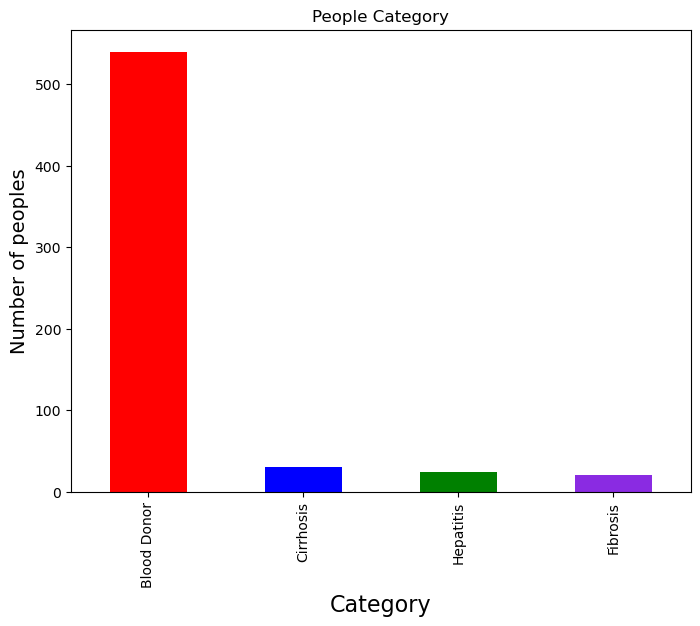

In [27]:
#checking the frequency of each class 
ax=ml_data['Category'].value_counts().plot(kind='bar',color=['red','blue','green','blueviolet'],
                                          title='People Category',figsize=(8, 6))

plt.xticks(range(4),['Blood Donor','Cirrhosis','Hepatitis','Fibrosis'])
ax.set_xlabel("Category",fontsize=16)
ax.set_ylabel("Number of peoples",fontsize=14)
plt.show()

In [28]:
data_without_categories = ml_data[['Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']]
labels = ml_data[['Category']]

In [29]:
from sklearn.utils import resample

# Example data (replace with actual dataset and category labels)
X = data_without_categories  # Your feature matrix
y = labels  # Your target labels (5 categories)

# Combine features and labels into a single DataFrame (for convenience)
data = np.column_stack((X, y))

# Identify the majority and minority classes
majority_class = data[data[:, -1] == 0]  # Replace '0' with your majority class label
minority_classes = [data[data[:, -1] == label] for label in np.unique(y) if label != 0]  # For the other categories

# Oversample each minority class to match the size of the majority class
oversampled_minority_classes = [resample(minority_class, 
                                         replace=True,         # Sample with replacement
                                         n_samples=len(majority_class),  # Match majority class size
                                         random_state=42)  # For reproducibility
                               for minority_class in minority_classes]

# Combine the majority class and oversampled minority classes back together
oversampled_data = np.vstack([majority_class] + oversampled_minority_classes)

# Separate the features and labels again
X_oversampled = oversampled_data[:, :-1]
y_oversampled = oversampled_data[:, -1]

# Now, you can apply your unsupervised clustering model (e.g., KMeans)

In [30]:
import pandas as pd

# Assuming 'oversampled_data' is your NumPy array
oversampled_df = pd.DataFrame(oversampled_data, columns=['Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT','Category'])


In [31]:
print(oversampled_df)

       Age  Sex   ALB    ALP   ALT    AST    BIL    CHE  CHOL   CREA    GGT  \
0     32.0  0.0  38.5   52.5   7.7   22.1    7.5   6.93  3.23  106.0   12.1   
1     32.0  0.0  38.5   70.3  18.0   24.7    3.9  11.17  4.80   74.0   15.6   
2     32.0  0.0  46.9   74.7  36.2   52.6    6.1   8.84  5.20   86.0   33.2   
3     32.0  0.0  43.2   52.0  30.6   22.6   18.9   7.33  4.74   80.0   33.8   
4     32.0  0.0  39.2   74.1  32.6   24.8    9.6   9.15  4.32   76.0   29.9   
...    ...  ...   ...    ...   ...    ...    ...    ...   ...    ...    ...   
2155  62.0  1.0  32.0  416.6   5.9  110.3   50.0   5.57  6.30   55.7  650.9   
2156  62.0  1.0  32.0  416.6   5.9  110.3   50.0   5.57  6.30   55.7  650.9   
2157  49.0  1.0  33.0  190.7   1.2   36.3    7.0   6.92  3.82  485.9  112.0   
2158  59.0  0.0  31.0   86.3   5.4   95.4  117.0   1.57  3.51   60.5   53.6   
2159  74.0  0.0  23.0   34.1   2.1   90.4   22.0   2.50  3.29   51.0   46.8   

      PROT  Category  
0     69.0       0.0  
1    

In [32]:
# Count occurrences of each category
category_counts = oversampled_df['Category'].value_counts()

print(category_counts)


Category
0.0    540
1.0    540
2.0    540
3.0    540
Name: count, dtype: int64


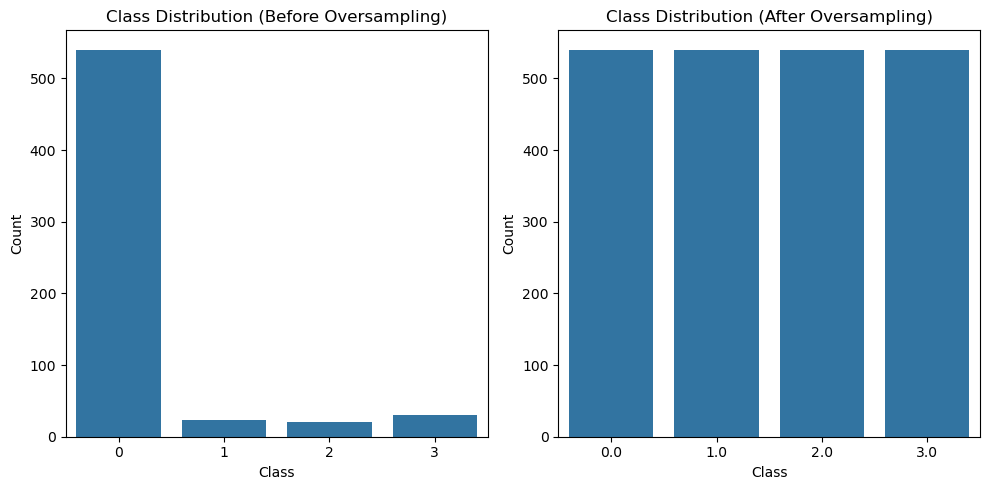

In [33]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Count original class distribution
unique_classes, counts_before = np.unique(y, return_counts=True)
unique_classes_after, counts_after = np.unique(y_oversampled, return_counts=True)

plt.figure(figsize=(10, 5))

# Before oversampling
plt.subplot(1, 2, 1)
sns.barplot(x=unique_classes, y=counts_before)
plt.title("Class Distribution (Before Oversampling)")
plt.xlabel("Class")
plt.ylabel("Count")

# After oversampling
plt.subplot(1, 2, 2)
sns.barplot(x=unique_classes_after, y=counts_after)
plt.title("Class Distribution (After Oversampling)")
plt.xlabel("Class")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

Text(0.5, 0, 'GGT')

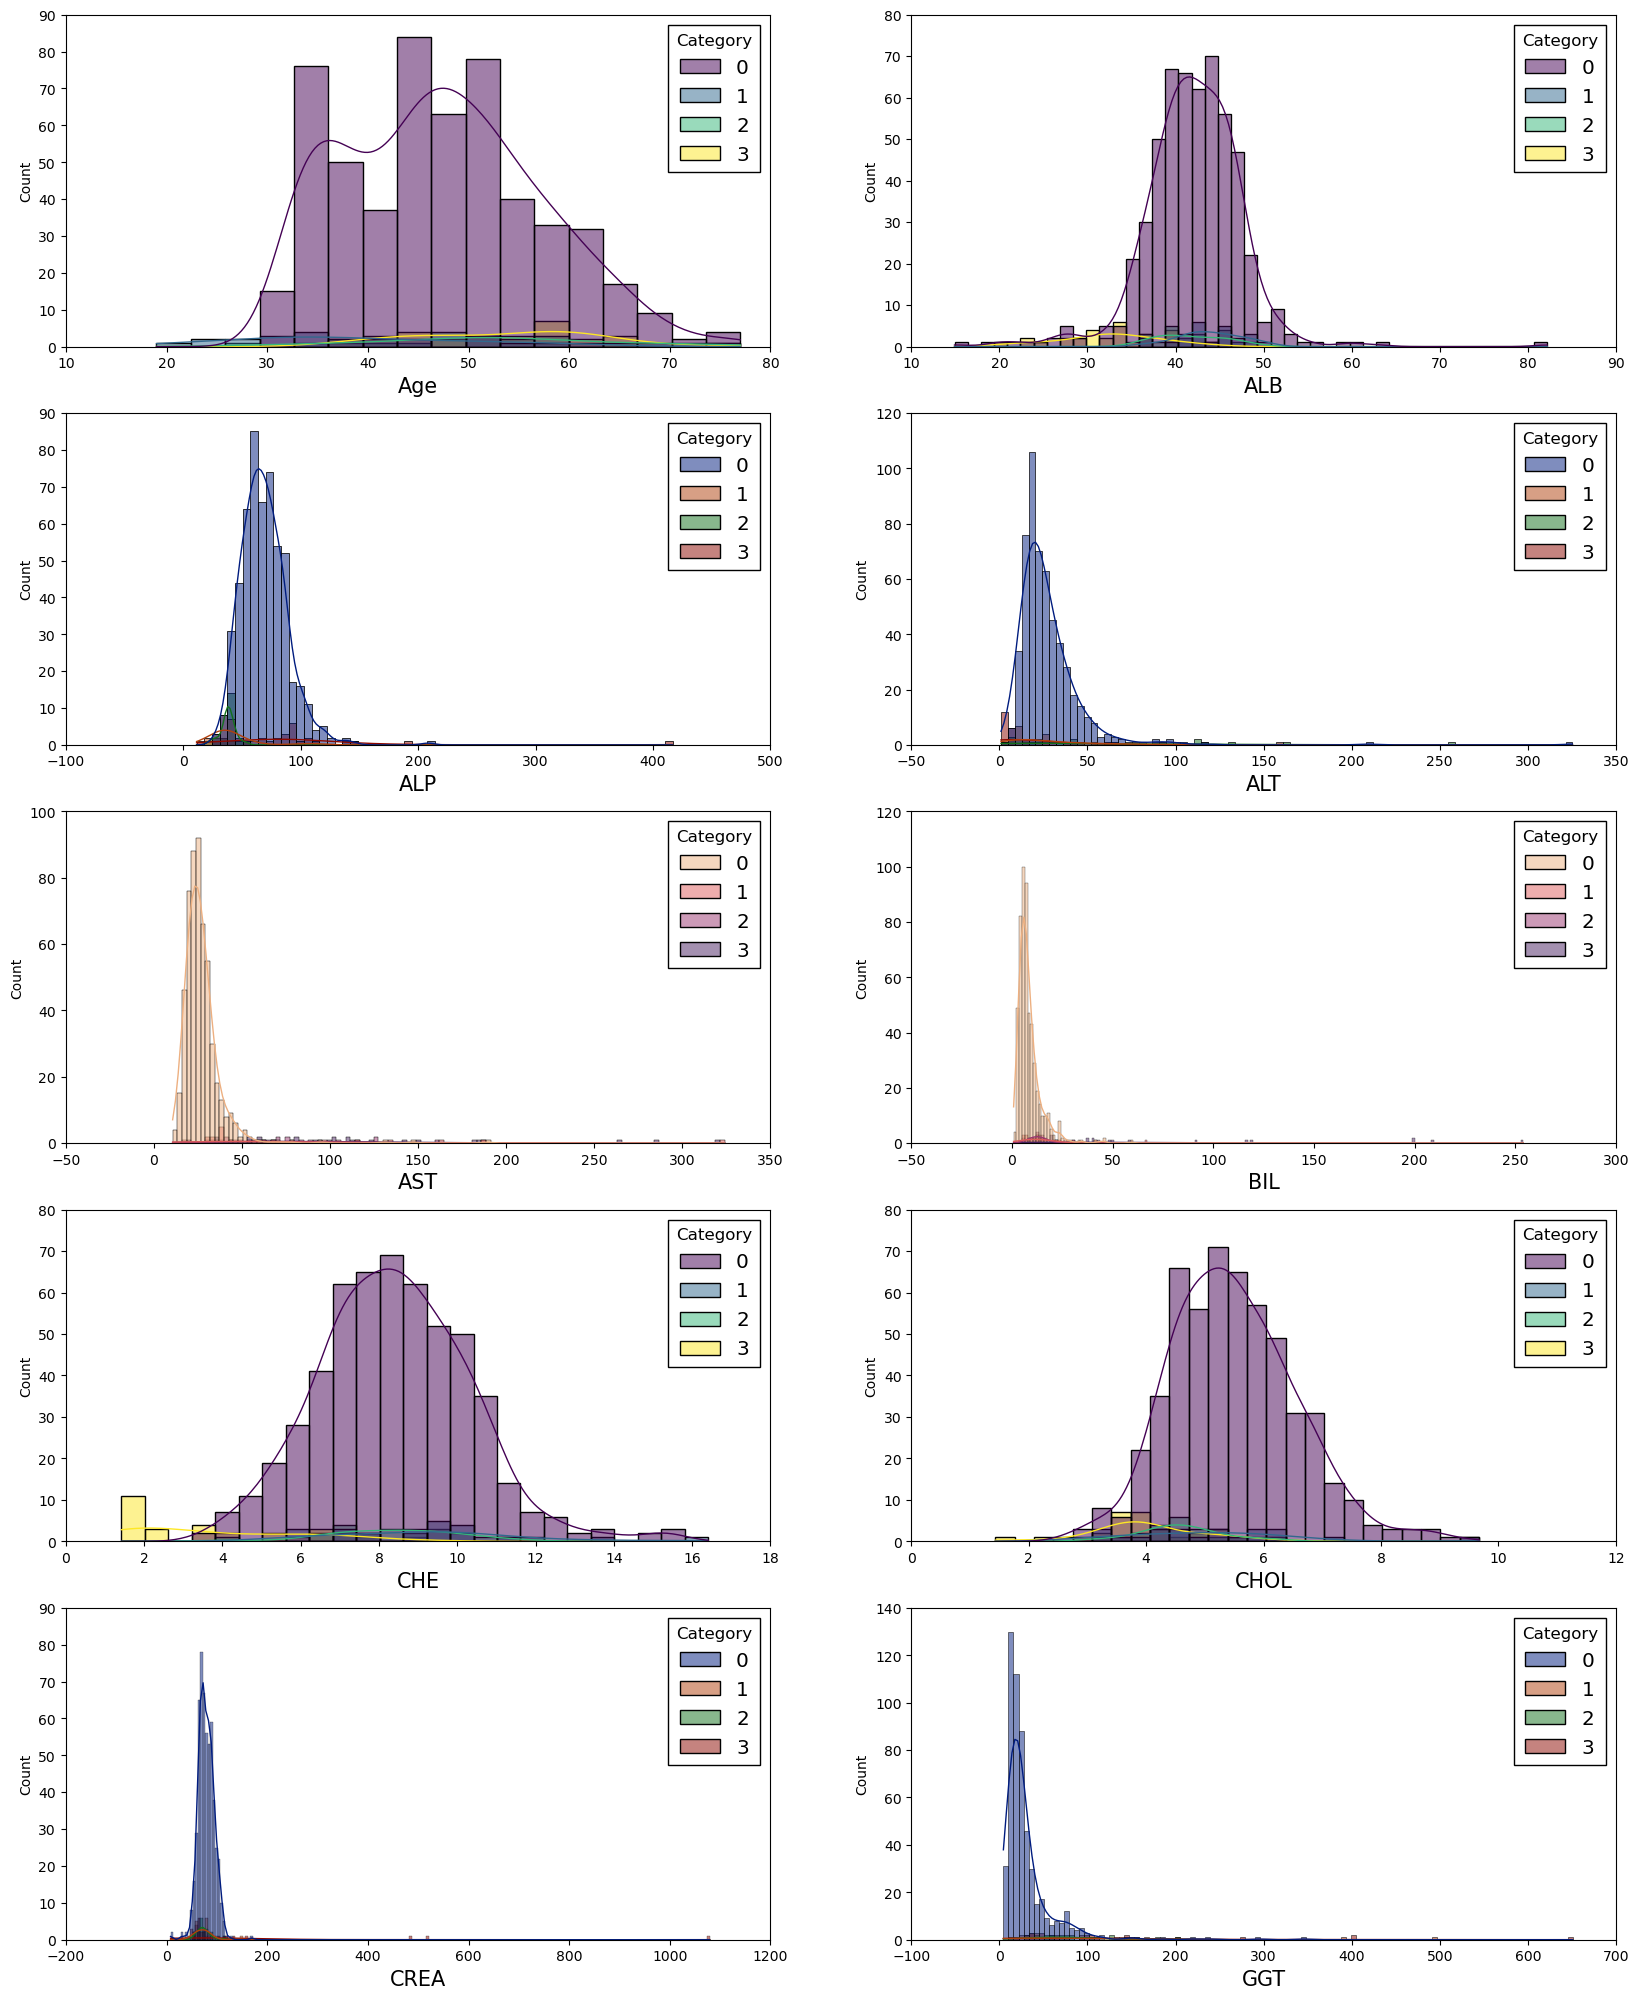

In [34]:
fig, ax = plt.subplots(5,2, figsize=(20,25)) 
plt.style.use("classic")


sns.histplot(x = ml_data["Age"], hue = ml_data["Category"], palette="viridis", kde=True, ax=ax[0,0])
ax[0,0].set_xlabel("Age",fontsize=15)

sns.histplot(x = ml_data["ALB"], hue = ml_data["Category"], palette="viridis", kde=True, ax=ax[0,1])
ax[0,1].set_xlabel("ALB",fontsize=15)

sns.histplot(x = ml_data["ALP"], hue = ml_data["Category"], palette="dark", kde=True, ax=ax[1,0])
ax[1,0].set_xlabel("ALP",fontsize=15)

sns.histplot(x = ml_data["ALT"], hue = ml_data["Category"], palette="dark", kde=True, ax=ax[1,1])
ax[1,1].set_xlabel("ALT",fontsize=15)

sns.histplot(x = ml_data["AST"], hue = ml_data["Category"], palette="flare", kde=True, ax=ax[2,0])
ax[2,0].set_xlabel("AST",fontsize=15)

sns.histplot(x = ml_data["BIL"], hue = ml_data["Category"], palette="flare", kde=True, ax=ax[2,1])
ax[2,1].set_xlabel("BIL",fontsize=15)

sns.histplot(x = ml_data["CHE"], hue = ml_data["Category"], palette="viridis", kde=True, ax=ax[3,0])
ax[3,0].set_xlabel("CHE",fontsize=15)

sns.histplot(x = ml_data["CHOL"], hue = ml_data["Category"], palette="viridis", kde=True, ax=ax[3,1])
ax[3,1].set_xlabel("CHOL",fontsize=15)

sns.histplot(x = ml_data["CREA"], hue = ml_data["Category"], palette="dark", kde=True, ax=ax[4,0])
ax[4,0].set_xlabel("CREA",fontsize=15)

sns.histplot(x = ml_data["GGT"], hue = ml_data["Category"], palette="dark", kde=True, ax=ax[4,1])
ax[4,1].set_xlabel("GGT",fontsize=15)

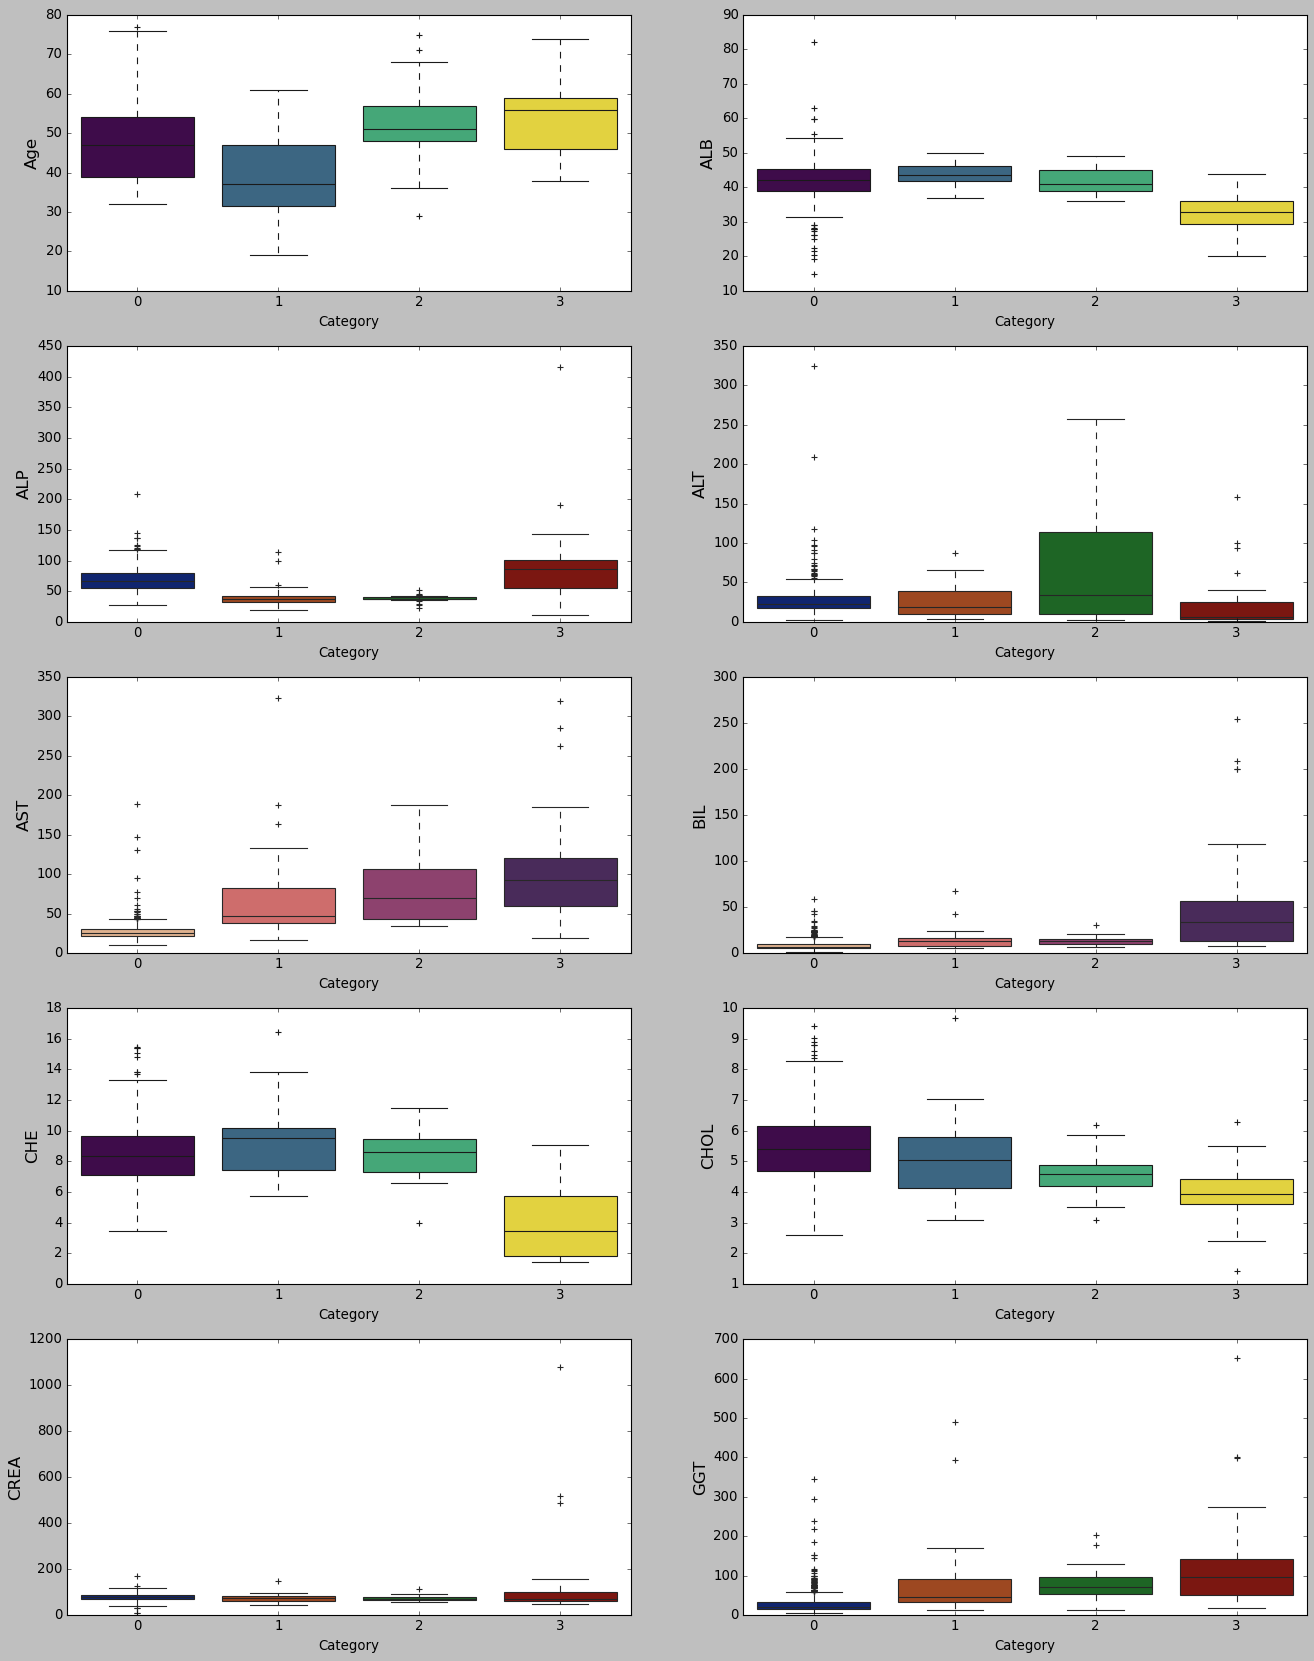

In [35]:
fig, ax = plt.subplots(5, 2, figsize=(20, 25)) 
plt.style.use("classic")

sns.boxplot(x="Category", y="Age", data=ml_data, palette="viridis", hue="Category", ax=ax[0,0])
ax[0,0].set_ylabel("Age", fontsize=15)
ax[0,0].legend_.remove()

sns.boxplot(x="Category", y="ALB", data=ml_data, palette="viridis", hue="Category", ax=ax[0,1])
ax[0,1].set_ylabel("ALB", fontsize=15)
ax[0,1].legend_.remove()

sns.boxplot(x="Category", y="ALP", data=ml_data, palette="dark", hue="Category", ax=ax[1,0])
ax[1,0].set_ylabel("ALP", fontsize=15)
ax[1,0].legend_.remove()

sns.boxplot(x="Category", y="ALT", data=ml_data, palette="dark", hue="Category", ax=ax[1,1])
ax[1,1].set_ylabel("ALT", fontsize=15)
ax[1,1].legend_.remove()

sns.boxplot(x="Category", y="AST", data=ml_data, palette="flare", hue="Category", ax=ax[2,0])
ax[2,0].set_ylabel("AST", fontsize=15)
ax[2,0].legend_.remove()

sns.boxplot(x="Category", y="BIL", data=ml_data, palette="flare", hue="Category", ax=ax[2,1])
ax[2,1].set_ylabel("BIL", fontsize=15)
ax[2,1].legend_.remove()

sns.boxplot(x="Category", y="CHE", data=ml_data, palette="viridis", hue="Category", ax=ax[3,0])
ax[3,0].set_ylabel("CHE", fontsize=15)
ax[3,0].legend_.remove()

sns.boxplot(x="Category", y="CHOL", data=ml_data, palette="viridis", hue="Category", ax=ax[3,1])
ax[3,1].set_ylabel("CHOL", fontsize=15)
ax[3,1].legend_.remove()

sns.boxplot(x="Category", y="CREA", data=ml_data, palette="dark", hue="Category", ax=ax[4,0])
ax[4,0].set_ylabel("CREA", fontsize=15)
ax[4,0].legend_.remove()

sns.boxplot(x="Category", y="GGT", data=ml_data, palette="dark", hue="Category", ax=ax[4,1])
ax[4,1].set_ylabel("GGT", fontsize=15)
ax[4,1].legend_.remove()

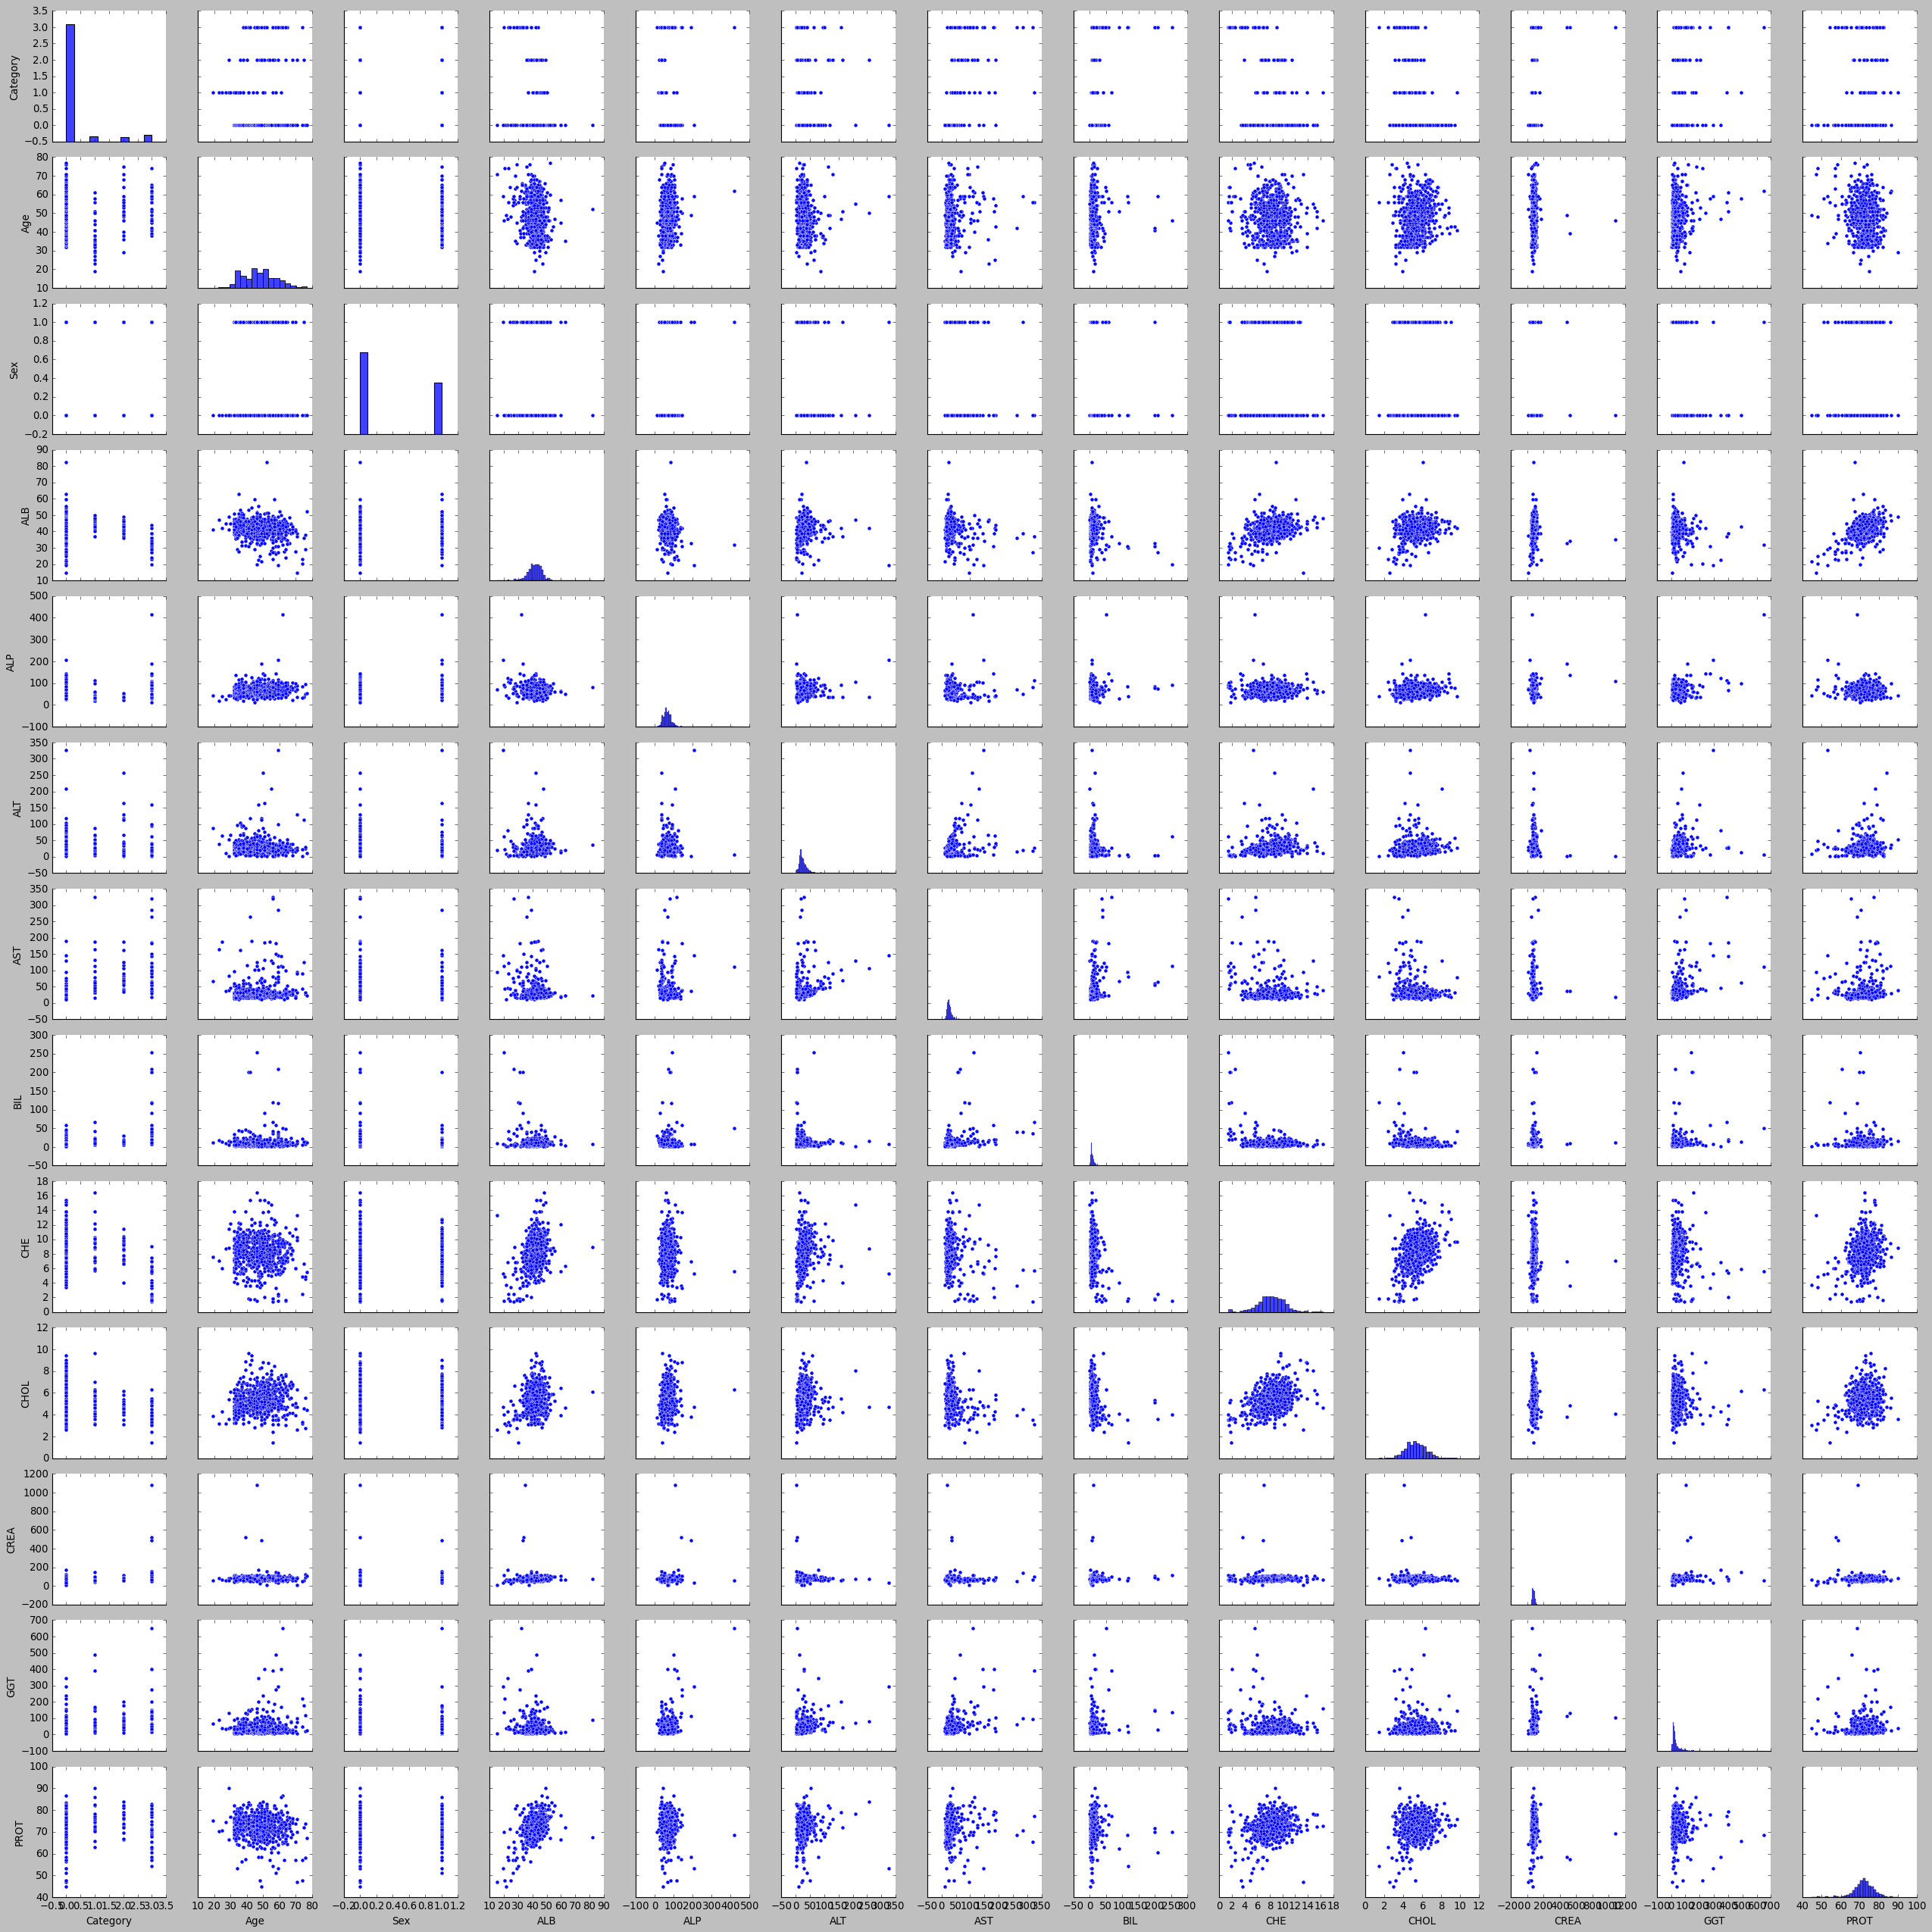

In [36]:
sns.pairplot(ml_data)
plt.show()

<Axes: >

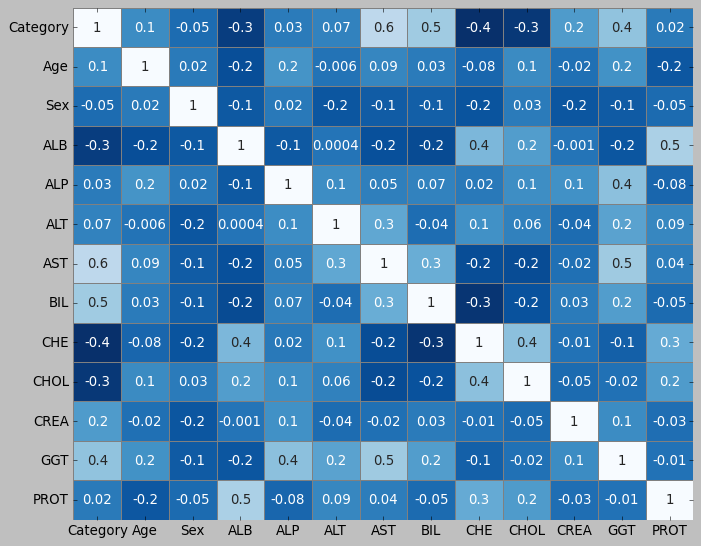

In [37]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(ml_data.corr(), annot=True, fmt='.1g', cmap="Blues_r", cbar=False, linewidths=0.5, linecolor='grey')

In [38]:
# Separate the features and labels again
X_oversampled = oversampled_data[:, :-1]
y_oversampled = oversampled_data[:, -1]

In [39]:
labels = y_oversampled

In [40]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(X_oversampled)

scaled_df = pd.DataFrame(scaled_data, columns=['Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT'])
print(scaled_df)

           Age       Sex       ALB       ALP       ALT       AST       BIL  \
0    -1.330961 -0.704163 -0.246809 -0.198028 -0.608776 -0.824831 -0.404884   
1    -1.330961 -0.704163 -0.246809  0.187880 -0.374361 -0.781183 -0.496657   
2    -1.330961 -0.704163  1.083772  0.283273  0.039847 -0.312806 -0.440574   
3    -1.330961 -0.704163  0.497683 -0.208868 -0.087602 -0.816438 -0.114268   
4    -1.330961 -0.704163 -0.135927  0.270265 -0.042085 -0.779505 -0.351350   
...        ...       ...       ...       ...       ...       ...       ...   
2155  1.178168  1.420127 -1.276425  7.695735 -0.649742  0.655846  0.678552   
2156  1.178168  1.420127 -1.276425  7.695735 -0.649742  0.655846  0.678552   
2157  0.090878  1.420127 -1.118023  2.798177 -0.756707 -0.586446 -0.417630   
2158  0.927255 -0.704163 -1.434828  0.534763 -0.661121  0.405709  2.386557   
2159  2.181819 -0.704163 -2.702048 -0.596943 -0.736225  0.321770 -0.035241   

           CHE      CHOL      CREA       GGT      PROT  
0    -

In [41]:
data_pca = PCA(n_components=12) # Do 12 components at first and then can choose which to keep later
components = data_pca.fit(scaled_df).components_ # Creating dummy variable so we can see which components we want to include before changing the actual dataset
components = pd.DataFrame(components).transpose() 
components.columns = ['Comp1', 'Comp2', 'Comp3', 'Comp4', 'Comp5', 'Comp6', 'Comp7', 'Comp8', 'Comp9', 'Comp10', 'Comp11', 'Comp12']
components.index =  data_without_categories.columns
components

,Comp1,Comp2,Comp3,Comp4,Comp5,Comp6,Comp7,Comp8,Comp9,Comp10,Comp11,Comp12
Age,0.259884,-0.039094,0.159888,-0.472224,0.081016,0.235278,0.517851,-0.542012,-0.075034,0.151856,0.016483,0.171883
Sex,0.051075,0.120064,0.060981,-0.719730,0.091885,-0.316873,-0.260374,0.320520,0.245933,0.330313,0.065792,-0.089159
ALB,-0.474061,-0.065199,0.166407,0.142392,-0.025575,-0.226575,0.021526,-0.093213,-0.144843,0.392404,0.541696,0.439899
ALP,0.308186,0.252464,0.513524,0.034135,0.021481,0.033764,-0.166346,0.284609,-0.291602,-0.126610,-0.234405,0.556892
ALT,-0.104351,-0.455949,0.135215,-0.053483,0.361083,0.697534,-0.225689,0.244920,0.036861,0.142789,0.101733,-0.011174
AST,0.239657,-0.513828,0.127641,0.194934,-0.011805,-0.279949,0.227992,0.110589,0.625787,-0.011413,-0.103127,0.281350
BIL,0.353895,-0.059704,-0.172238,0.136170,-0.459100,0.155984,-0.485844,-0.301680,0.049450,0.490382,-0.091044,0.098065
CHE,-0.467818,0.106165,0.216583,0.089991,-0.021945,0.041329,0.181851,0.000693,0.081425,0.430406,-0.692155,-0.093013
CHOL,-0.251479,0.285673,0.381256,-0.097202,-0.425234,0.308766,-0.102331,-0.130875,0.510818,-0.311736,0.194738,-0.023372
CREA,0.105729,0.379884,0.066300,0.263691,0.673781,-0.063884,-0.244403,-0.372903,0.326308,0.075498,0.038527,-0.008328


In [42]:
var_ratio = data_pca.explained_variance_ratio_ # Find the amount of variance explained by each components
var_ratio= pd.DataFrame(var_ratio).transpose() # Transposes the data to make it easier to read
var_ratio.columns = ['Comp1', 'Comp2', 'Comp3', 'Comp4', 'Comp5', 'Comp6', 'Comp7', 'Comp8', 'Comp9', 'Comp10', 'Comp11', 'Comp12']
var_ratio.index = ['Proportion of Variance']
var_ratio

,Comp1,Comp2,Comp3,Comp4,Comp5,Comp6,Comp7,Comp8,Comp9,Comp10,Comp11,Comp12
Proportion of Variance,0.252481,0.132829,0.125118,0.110719,0.081374,0.066756,0.062383,0.053672,0.04221,0.027384,0.025201,0.019872


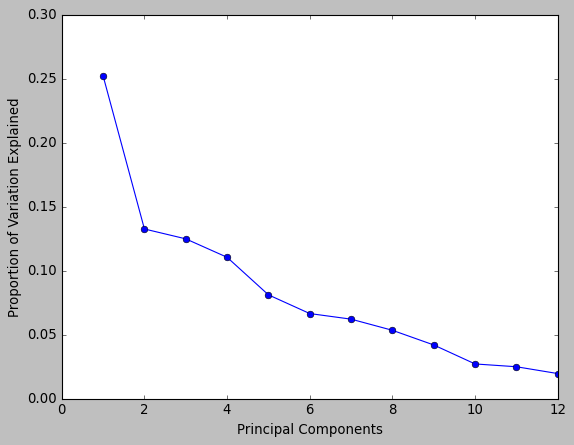

In [43]:
len_columns = len(components.columns)
x_axis = list(range(1, len_columns+1))
var_ratio = data_pca.explained_variance_ratio_ # Find the amount of variance explained by each components
plt.plot(x_axis, var_ratio, '-o')
plt.xlabel('Principal Components')
plt.ylabel('Proportion of Variation Explained')
plt.show()

In [44]:
data_pcomp = data_pca.fit_transform(scaled_data)
data_pcomp = pd.DataFrame(data_pcomp)
data_pcomp = data_pcomp.iloc[:,0:10]
data_pcomp.columns = ['Comp1', 'Comp2', 'Comp3','Comp4','Comp5', 'Comp6', 'Comp7', 'Comp8', 'Comp9', 'Comp10']
data_pcomp.head()

,Comp1,Comp2,Comp3,Comp4,Comp5,Comp6,Comp7,Comp8,Comp9,Comp10
0,-0.195348,0.658527,-1.623932,1.048836,0.472000,-0.442208,-0.016545,0.760493,-0.977105,-0.339009
1,-1.430558,0.547450,-0.316981,0.720863,-0.120533,-0.130868,-0.396494,0.373798,-0.553590,-0.615759
2,-1.709654,-0.105317,0.219988,0.854144,-0.079001,-0.344770,-0.782103,0.136070,-0.422828,-0.579663
3,-1.107588,0.163598,-0.639303,0.809950,-0.152849,-0.110050,-0.751656,0.183571,-0.662679,-0.507912
4,-0.688714,0.729720,-0.693236,1.021277,0.056531,0.259339,-0.100021,1.007927,-0.649527,-0.187502


In [45]:
pca = PCA(n_components=0.95)  # Retain 95% variance
X_pca = pca.fit_transform(scaled_df)
print(f"Number of components chosen: {pca.n_components_}")

Number of components chosen: 10


In [46]:
!pip install kneed


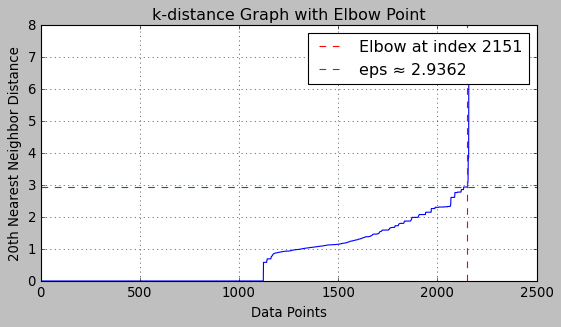

Estimated eps: 2.9362


In [47]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt
from kneed import KneeLocator

# Step 1: Compute k-nearest neighbor distances
k = 20
neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit(data_pcomp)
distances, indices = neighbors_fit.kneighbors(data_pcomp)

# Step 2: Sort the k-th nearest neighbor distances
k_distances = np.sort(distances[:, k-1])

# Step 3: Use KneeLocator to find the elbow point
kneedle = KneeLocator(range(len(k_distances)), k_distances, curve='convex', direction='increasing')
eps = k_distances[kneedle.knee]

# Plot
plt.figure(figsize=(8, 4))
plt.plot(k_distances)
plt.axvline(x=kneedle.knee, color='r', linestyle='--', label=f'Elbow at index {kneedle.knee}')
plt.axhline(y=eps, color='g', linestyle='--', label=f'eps ≈ {eps:.4f}')
plt.title("k-distance Graph with Elbow Point")
plt.xlabel("Data Points")
plt.ylabel(f"{k}th Nearest Neighbor Distance")
plt.legend()
plt.grid(True)
plt.show()

print(f"Estimated eps: {eps:.4f}")


In [48]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=eps, min_samples=20)
labels = dbscan.fit_predict(data_pcomp)

# Count number of clusters (excluding noise, labeled as -1)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f"Estimated number of clusters: {n_clusters}")
print(f"Estimated number of noise points: {n_noise}")


Estimated number of clusters: 7
Estimated number of noise points: 3


In [49]:
from sklearn.metrics import silhouette_score

if n_clusters > 1:
    score = silhouette_score(data_pcomp, labels)
    print(f"Silhouette Score: {score:.4f}")
else:
    print("Too few clusters for silhouette score.")


Silhouette Score: 0.3237


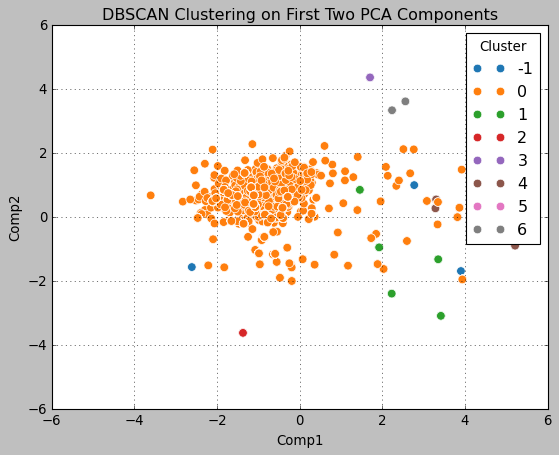

In [50]:
import seaborn as sns

data_pcomp['Cluster'] = labels  # Add labels to the DataFrame

plt.figure(figsize=(8, 6))
sns.scatterplot(data=data_pcomp, x='Comp1', y='Comp2', hue='Cluster', palette='tab10', s=60)
plt.title('DBSCAN Clustering on First Two PCA Components')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


In [51]:
import numpy as np
unique, counts = np.unique(labels, return_counts=True)
label_counts = dict(zip(unique, counts))
print(label_counts)

{-1: 3, 0: 1902, 1: 91, 2: 30, 3: 21, 4: 53, 5: 21, 6: 39}


In [52]:
print("All unique labels:", sorted(set(labels)))
print("Total clusters (excluding -1):", len(set(labels)) - (1 if -1 in labels else 0))


All unique labels: [-1, 0, 1, 2, 3, 4, 5, 6]
Total clusters (excluding -1): 7


In [53]:
oversampled_df['Cluster'] = labels
pd.crosstab(oversampled_df['Cluster'], oversampled_df['Category'])


Category,0.0,1.0,2.0,3.0
Cluster,,,,
-1,3,0,0,0
0,537,492,510,363
1,0,48,0,43
2,0,0,30,0
3,0,0,0,21
4,0,0,0,53
5,0,0,0,21
6,0,0,0,39


In [54]:
# Count the number of points in each cluster (excluding noise)
cluster_counts = pd.Series(labels).value_counts()
print(cluster_counts)


 0    1902
 1      91
 4      53
 6      39
 2      30
 3      21
 5      21
-1       3
Name: count, dtype: int64


In [56]:
# Compute purity manually
import numpy as np
from sklearn.metrics import confusion_matrix

# Create confusion matrix
cm = confusion_matrix(y_oversampled, labels)  # true_labels: ground truth labels
print(cm)


# Purity calculation
purity = np.sum(np.amax(cm, axis=0)) / np.sum(cm)
print(f"Purity: {purity:.4f}")


[[  0   0   0   0   0   0   0   0]
 [  3 537   0   0   0   0   0   0]
 [  0 492  48   0   0   0   0   0]
 [  0 510   0  30   0   0   0   0]
 [  0 363  43   0  21  53  21  39]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]]
Purity: 0.3481
